# Histopathologic Cancer Detection Using Convolutional Neural Networks

## Introduction

### Problem Statement
Histopathologic cancer detection is a crucial step in the diagnosis of cancer from biopsy samples. This process typically involves pathologists examining tissue samples under a microscope to identify the presence of cancer cells. However, this manual process can be time-consuming and is subject to human error. The objective of this machine learning challenge is to automate the detection of metastatic cancer in histopathologic scans of lymph node sections, thereby assisting pathologists in making more accurate diagnoses.

### Dataset Overview
The dataset provided for this challenge comprises a large number of small pathology images, which have been derived from larger digital pathology scans. Each image needs to be classified as either containing metastatic tissue or not, based on the presence of cancer cells within the central region of the image.

#### Size and Number of Images
The training set includes a total of 57459 images, each with an associated binary label indicating the presence or absence of metastatic tissue. The test set comprises 220025 images, which will be used to evaluate the performance of our predictive models.

#### Image Dimensions and Structure
Each image in the dataset is 96 x 96 pixels in size. The images are color images.

#### Significance of the Central 32x32px Region
For each image, the label is determined based on the central 32x32 pixels. A positive label indicates that this central region contains at least one pixel of tumor tissue. The presence of tumor tissue outside this central region does not influence the label. This approach ensures that models focus on the most relevant part of the image and allows for consistency when applied to whole-slide images.

This problem presents an opportunity to leverage deep learning models to classify images quickly and accurately, potentially improving the speed and reliability of cancer diagnosis.


# Exploratory Data Analysis (EDA)

The process of Exploratory Data Analysis (EDA) serves as the foundation for understanding the dataset we are working with. By loading the image datasets and their corresponding labels, we initiate a deep dive into the nature and characteristics of the data that will guide our modeling strategy.

## Data Loading
Our initial step involves loading the dataset, which comprises a large collection of pathology images labeled with their cancer status. This dataset forms the basis of our analysis and subsequent modeling efforts.

## Data Inspection
A critical aspect of EDA is visually inspecting the sample images alongside their labels. This inspection helps us grasp the visual differences between cancerous and non-cancerous samples and assess the data's overall quality and variability. By displaying a select number of images, we begin to understand the challenges inherent in distinguishing between the two classes based on visual cues alone.

## Data Visualization
To comprehend the distribution of labels within our dataset, we visualize the class distribution through histograms. This visualization aids in identifying any class imbalances that could influence the performance of our predictive models and suggests strategies for mitigation, such as data augmentation or resampling techniques.

## Data Cleaning
Ensuring the integrity of our data is paramount. Through data quality checks, we verify there are no missing labels or unreadable image files. Identifying and addressing such issues early on is crucial for preventing errors during model training and ensuring the robustness of our analysis.

## EDA Summary
The exploratory data analysis provides a wealth of insights into the dataset's composition, the challenges of the classification task, and the quality of the data. These findings inform our plan of analysis, laying the groundwork for model architecture selection, data preprocessing, and augmentation strategies aimed at tackling the unique challenges of histopathologic cancer detection.

Sample images with labels from training set:


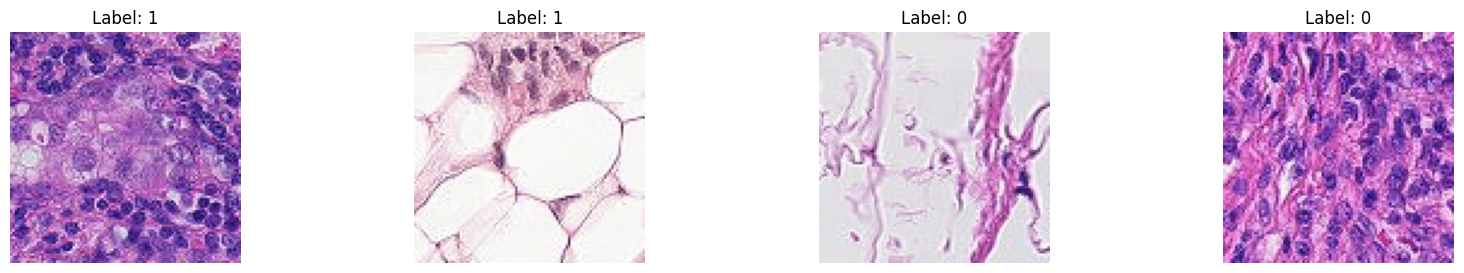

Label distribution in the dataset:


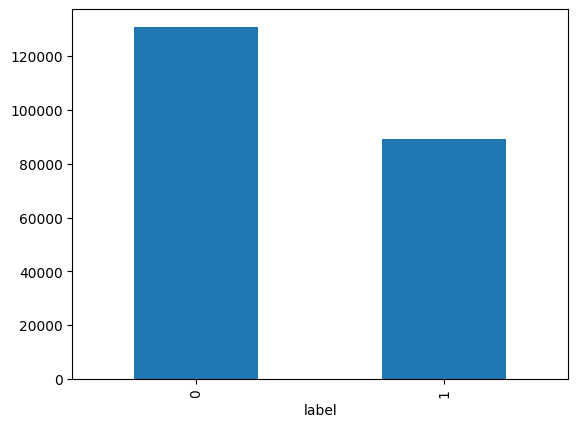

Missing labels: 0
Unreadable files: 0


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

# Load labels
labels_df = pd.read_csv('train_labels.csv')

# Define a function to load images with labels
def load_images_with_labels(data_dir, labels, num_images=4):
    images = os.listdir(data_dir)
    sample_images = np.random.choice(images, size=num_images, replace=False)
    fig, axs = plt.subplots(1, num_images, figsize=(20, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(data_dir, img_name)
        img = Image.open(img_path)
        img_id = img_name.split('.')[0]
        label = labels.loc[labels['id'] == img_id, 'label'].values[0]
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Label: {label}")
    plt.show()

# Visualize sample images with labels
print("Sample images with labels from training set:")
load_images_with_labels('train/', labels_df)

# Plot histogram of label distribution
print("Label distribution in the dataset:")
labels_df['label'].value_counts().plot(kind='bar')
plt.show()

# Check for missing values in the labels
missing_labels = labels_df['label'].isnull().sum()
print(f"Missing labels: {missing_labels}"

# Data cleaning
# Check if all image files are readable
def check_images(data_dir, labels):
    unreadable_files = []
    for img_id in labels['id']:
        img_path = os.path.join(data_dir, f"{img_id}.tif")
        try:
            img = Image.open(img_path)
            img.verify()  # Check if image is corrupted
        except (IOError, SyntaxError) as e:
            unreadable_files.append(img_id)
    return unreadable_files

# Replace this with the correct path to your image directory
train_images_dir = 'train/'
unreadable_files = check_images(train_images_dir, labels_df)
print(f"Unreadable files: {len(unreadable_files)}")


# Exploratory Data Analysis Summary

Our exploratory data analysis (EDA) provides a foundational understanding of the dataset's structure, offering crucial insights into the challenges we face and informing our approach to model selection and training.

## Visual Inspection

The examination of sampled images reveals significant visual distinctions between the classes. Images labeled as '0' typically show a less dense cellular configuration, suggesting non-cancerous tissue, whereas images labeled as '1' demonstrate denser clusters of cells, indicative of tumor presence. These observations are vital, highlighting key features that our chosen models should be adept at recognizing.

## Label Distribution

We observed a slight imbalance in the class distribution, with a predominance of non-cancerous samples. This imbalance could potentially skew the model's predictions towards the more frequent class. To counteract this, we consider employing strategies such as data resampling or adjusting the class weights during model training to ensure equitable learning from both classes.

## Data Quality Checks

Our dataset exhibited a high level of integrity, with no missing labels or unreadable image files detected. This cleanliness allows us to proceed with confidence into the model development phase, focusing on optimization and evaluation without being hindered by data quality concerns.

## Model Consideration Based on EDA Findings

The insights gained from our EDA underscore the dataset's suitability for advanced pattern recognition tasks, achievable through deep learning. For this project, we have selected two architectures known for their balance of efficiency and accuracy in image classification:

- **MobileNetV2**: Building upon the original MobileNet, MobileNetV2 introduces inverted residuals and linear bottlenecks to improve efficiency and accuracy. Its lightweight nature makes it an excellent candidate for processing a vast number of images swiftly, a critical factor for this project's scope.

- **EfficientNetB0**: As part of a scalable architecture family, EfficientNetB0 uses a compound coefficient to uniformly scale network width, depth, and resolution. Despite its potential, our initial attempts have highlighted challenges in tuning this model to achieve expected performance levels.

As we progress, we will explore these architectures further, fine-tuning them to our specific task and rigorously evaluating their performance. Our goal is to achieve a balance between computational efficiency and the accuracy necessary for effective cancer detection in histopathologic scans.

# Model Architecture

Selecting the right model architecture is critical in achieving high performance for image classification tasks. For this project, we have chosen MobileNetV2 and EfficientNetB0 due to their balance between efficiency and accuracy. Below is an overview of each architecture along with the rationale for their selection.

## Introduction to MobileNetV2

### Architecture Highlights
MobileNetV2 builds upon the ideas from the original MobileNet, enhancing the architecture with inverted residuals and linear bottlenecks. This model captures the essence of an efficient architecture through depthwise separable convolutions and streamlines the flow of information through the network.

### Pros and Cons for the Task
**Pros:**
- **Lightweight and Efficient:** Utilizes less computational resources, which is advantageous for processing large datasets.
- **Improved Accuracy:** Provides better accuracy compared to its predecessor, making it suitable for a variety of tasks.

**Cons:**
- **Trade-off with Complexity:** May struggle with highly complex image classification tasks when compared to larger, more computationally intensive models.

## Introduction to EfficientNetB0

### Architecture Highlights
EfficientNetB0 is part of the EfficientNet family, which systematically scales up CNNs in a more structured manner. This baseline network uses a compound coefficient to uniformly scale the width, depth, and resolution of the network, based on a carefully studied balance.

### Pros and Cons for the Task
**Pros:**
- **Balanced Scaling:** Makes it a robust model that can handle a wide range of image classification tasks.
- **State-of-the-Art Performance:** Often delivers higher accuracy and efficiency on benchmark datasets.

**Cons:**
- **Complexity:** More complex than MobileNetV2, which may require more computational power for training and inference.

## Explanation of Model Selection
We have chosen MobileNetV2 and EfficientNetB0 because they represent state-of-the-art model architectures that are designed for high efficiency and accuracy while being computationally feasible. They have been proven effective in various image classification benchmarks and competitions, which makes them promising candidates for our task of classifying histopathologic cancer images.

## Description of the Chosen Architectures
In the following sections, we will explore the specifics of MobileNetV2 and EfficientNetB0. We will configure the architectures with the appropriate input shape for our images, tailor the output layers for binary classification, and apply transfer learning by utilizing weights pre-trained on the ImageNet dataset. The final model architectures will be compiled and ready for training with our dataset.


In [46]:
# Importing necessary libraries
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

# Parameters
input_shape = (96, 96, 3)  # Example input shape, adjust to your dataset's specific dimensions
num_classes = 2  # Binary classification

# Building MobileNetV2 Model
def build_mobilenet_v2_model(input_shape, num_classes):
    base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze layers for transfer learning
    return model

mobilenet_v2_model = build_mobilenet_v2_model(input_shape, num_classes)
mobilenet_v2_model.summary()

# Building EfficientNetB0 Model
def build_efficientnet_b0_model(input_shape, num_classes):
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze layers for transfer learning
    return model

efficientnet_b0_model = build_efficientnet_b0_model(input_shape, num_classes)
efficientnet_b0_model.summary()


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_19[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_8         │ (None, 96, 96, 3) │          0 │ input_layer_20[0… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 96, 96, 3) │          7 │ rescaling_8[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_9         │ (None, 96, 96, 3) │          0 │ normalization_4[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 97, 97, 3) │          0 │ rescaling_9[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 48, 48,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 48, 48,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 48, 48,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 48, 48,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 48, 48,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 48, 48,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 48, 48,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 48, 48,    │        512 │ block1a_se_excit

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Model Training with MobileNetV2

The training phase is a critical step in our project, where we apply the MobileNetV2 architecture to learn from histopathologic cancer detection data. This section details the training setup, including data preprocessing, model compilation, and the execution of the training process.

## Data Preparation and Augmentation

Before training, we prepare our dataset by splitting it into training and validation sets. This ensures that we have a separate dataset to evaluate the model's performance and prevent overfitting. We utilize TensorFlow's `ImageDataGenerator` for data augmentation, which introduces variability in the training data through transformations like rotation, zoom, and horizontal flipping. This process enhances the model's ability to generalize from the training data to unseen data, improving its robustness.

## Data Generators

We create data generators for both training and validation datasets. These generators are responsible for feeding the data to the model in batches during the training and validation processes. By specifying the `preprocessing_function` as `preprocess_input` from the MobileNetV2 application, we ensure the input data is correctly preprocessed for the model.

## Model Compilation

The MobileNetV2 model is compiled with the Adam optimizer and binary crossentropy loss function, aligning with our binary classification task. The choice of optimizer and loss function is crucial for effective learning, and in this case, they are selected to suit the characteristics of our problem and the architecture of MobileNetV2.

## Callbacks for Efficient Training

To enhance the training process, we employ callbacks like `EarlyStopping` and `ModelCheckpoint`. `EarlyStopping` prevents overfitting by halting the training if the validation loss does not improve for a defined number of epochs. `ModelCheckpoint` is configured to save all models after each epoch, allowing us to retain and evaluate the model at different stages of training.

## Training Execution

With the setup complete, the model undergoes training for a predefined number of epochs. During this process, it learns to distinguish between cancerous and non-cancerous samples, with the training and validation performance closely monitored through the loss and accuracy metrics.

## Summary

The training of MobileNetV2 using augmented histopathologic cancer detection data is a meticulous process that involves careful data preparation, model compilation, and the strategic use of callbacks. This phase is essential for developing a model capable of accurately identifying the presence of cancerous tissue in microscopic images.

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the labels
labels_df = pd.read_csv('train_labels.csv')

# Add '.tif' extension to 'id' so it matches the file names
labels_df['id'] = labels_df['id'].apply(lambda x: f'{x}.tif')
labels_df.rename(columns={'id': 'filename', 'label': 'class'}, inplace=True)

# Split the dataset into training and validation sets
train_df, validation_df = train_test_split(labels_df, test_size=0.2, random_state=42, stratify=labels_df['class'])

# Data Generators
TRAIN_DIR = 'train'
TEST_DIR = 'test'
BATCH_SIZE = 32
EPOCHS = 10
IMG_SIZE = (96, 96)  # Match MobileNetV2 expected input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_DIR,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory=TRAIN_DIR,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw')

# Load and compile the MobileNetV2 model
mobilenet_v2_model = build_mobilenet_v2_model(IMG_SIZE + (3,), 1)

mobilenet_v2_model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model_checkpoint = model_checkpoint = ModelCheckpoint(
    filepath='model_mobilenet_v2_epoch_{epoch:02d}.keras',
    save_best_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1)

# Train the model
history = mobilenet_v2_model.fit(
    train_generator,
    steps_per_epoch=train_df.shape[0] // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_df.shape[0] // BATCH_SIZE,
    callbacks=[early_stopping, model_checkpoint]
)


Found 176020 validated image filenames.
Found 44005 validated image filenames.
Epoch 1/10


/Users/jason/Documents/week3/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7892 - loss: 0.4693
Epoch 1: saving model to model_mobilenet_v2_epoch_01.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1013s 183ms/step - accuracy: 0.7892 - loss: 0.4693 - val_accuracy: 0.8347 - val_loss: 0.3703
Epoch 2/10
   1/5500 ━━━━━━━━━━━━━━━━━━━━ 4:05 45ms/step - accuracy: 0.8438 - loss: 0.3143
Epoch 2: saving model to model_mobilenet_v2_epoch_02.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.8438 - loss: 0.1572 - val_accuracy: 1.0000 - val_loss: 0.1090
Epoch 3/10


2024-03-27 03:06:01.802910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)
2024-03-27 03:06:01.829652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1268/5500 ━━━━━━━━━━━━━━━━━━━━ 9:29 135ms/step - accuracy: 0.8131 - loss: 0.4218

KeyboardInterrupt: 

# Generating Submission File for the Competition

The final step in our project involves preparing our model's predictions on the test set to submit to the competition. This process entails processing each test image, predicting the probability of cancer presence, and creating a CSV file with these predictions in the required format. Below is an overview of how we accomplished this task using the trained model.

## Preprocessing Test Images

For each image in the test dataset, we perform a series of preprocessing steps to prepare it for prediction. This involves resizing the image to match the input dimensions expected by the model (96x96 pixels in our case) and applying the same preprocessing function used during training. This ensures consistency in how the model interprets the test images compared to the training images.

## Loading the Trained Model

We load the trained model from a saved file. This model has been previously trained on our dataset and is now ready to make predictions on new, unseen images from the test set.

## Predicting and Formatting the Output

With the model loaded, we iterate over each test image, predict the probability of tumor tissue presence, and apply a threshold to convert this probability into a binary label (1 for tumor presence, 0 for its absence). The choice of threshold (0.5 in our case) plays a critical role in balancing sensitivity and specificity.

## Creating the Submission CSV File

The predictions for each test image are written to a CSV file in the format specified by the competition guidelines:

- The `id` column contains the file name of the test image (minus the file extension), serving as the unique identifier for each prediction.
- The `label` column contains the binary label indicating the presence or absence of tumor tissue.

This file is named `submission2.csv` and includes a header row followed by rows for each image's prediction. This structured format ensures that our submission is compatible with the competition's evaluation system.

## Summary

The creation of the submission file is a critical step that bridges our model's predictions with the competition's evaluation process. By carefully preprocessing the test images, leveraging our trained model for predictions, and meticulously formatting the output, we prepare a submission that reflects our model's capabilities in detecting metastatic cancer from histopathologic scans.


In [48]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import csv

# Function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it a batch of one
    return preprocess_input(img_array)  # Assuming you have this function

# Load your trained model
model = load_model('model_efficientnet_b0_epoch_03.keras')

# Directory containing test images and output file path
test_dir = 'test'
output_file = 'submission2.csv'
threshold = 0.5  # Threshold for classifying probabilities

# Initialize CSV file with headers
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'label'])

# Process images, predict, and write binary labels based on threshold
with open(output_file, 'a', newline='') as file:
    writer = csv.writer(file)
    for image_file in os.listdir(test_dir):
        if image_file.endswith('.tif'):  # Ensure to process only images
            file_path = os.path.join(test_dir, image_file)
            img = preprocess_image(file_path, target_size=(96, 96))
            pred = model.predict(img)
            # Convert probability to binary label based on threshold
            label = int(pred[0][0] >= threshold)
            writer.writerow([image_file.split('.')[0], label])


/Users/jason/Documents/week3/venv/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 428 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [47]:
# This is a similar code section that trained the EfficientNetB0 model to that of the code that trained mobilenet_v2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
from sklearn.model_selection import train_test_split

# Load labels
labels_df = pd.read_csv('train_labels.csv')
labels_df['id'] = labels_df['id'].apply(lambda x: f'{x}.tif')
labels_df.rename(columns={'id': 'filename', 'label': 'class'}, inplace=True)

# Split the dataset
train_df, validation_df = train_test_split(labels_df, test_size=0.2, random_state=42, stratify=labels_df['class'])

# Data Generators
TRAIN_DIR = 'train'
BATCH_SIZE = 32
IMG_SIZE = (96, 96)

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_DIR,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory=TRAIN_DIR,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw')

# EfficientNetB0 Model
def build_efficientnet_b0_model(input_shape, num_classes):
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape + (3,), weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    return model

efficientnet_b0_model = build_efficientnet_b0_model(IMG_SIZE, 1)

efficientnet_b0_model.compile(optimizer='adam',
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint(
    filepath='model_efficientnet_b0_epoch_{epoch:02d}.keras',
    save_best_only=False,
    verbose=1)

# Train the model
history = efficientnet_b0_model.fit(
    train_generator,
    steps_per_epoch=train_df.shape[0] // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_df.shape[0] // BATCH_SIZE,
    callbacks=[early_stopping, model_checkpoint])


Found 176020 validated image filenames.
Found 44005 validated image filenames.
Epoch 1/10


/Users/jason/Documents/week3/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7773 - loss: 0.4715
Epoch 1: saving model to model_efficientnet_b0_epoch_01.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1268s 230ms/step - accuracy: 0.7773 - loss: 0.4715 - val_accuracy: 0.8217 - val_loss: 0.3953
Epoch 2/10
   1/5500 ━━━━━━━━━━━━━━━━━━━━ 7:58 87ms/step - accuracy: 0.7188 - loss: 0.4543
Epoch 2: saving model to model_efficientnet_b0_epoch_02.keras


2024-03-27 23:25:15.398858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)
2024-03-27 23:25:15.443343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.7188 - loss: 0.2272 - val_accuracy: 1.0000 - val_loss: 0.0624
Epoch 3/10
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7961 - loss: 0.4432
Epoch 3: saving model to model_efficientnet_b0_epoch_03.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1209s 220ms/step - accuracy: 0.7961 - loss: 0.4432 - val_accuracy: 0.8182 - val_loss: 0.3967
Epoch 4/10
   1/5500 ━━━━━━━━━━━━━━━━━━━━ 10:11 111ms/step - accuracy: 0.7500 - loss: 0.4510
Epoch 4: saving model to model_efficientnet_b0_epoch_04.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.7500 - loss: 0.2255 - val_accuracy: 0.8000 - val_loss: 0.2580


2024-03-27 23:45:24.858104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:45:24.890117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch 5/10
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7937 - loss: 0.4460
Epoch 5: saving model to model_efficientnet_b0_epoch_05.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1236s 224ms/step - accuracy: 0.7937 - loss: 0.4460 - val_accuracy: 0.8157 - val_loss: 0.4003
Epoch 6/10
   1/5500 ━━━━━━━━━━━━━━━━━━━━ 6:37 72ms/step - accuracy: 0.9375 - loss: 0.2437
Epoch 6: saving model to model_efficientnet_b0_epoch_06.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.9375 - loss: 0.1219 - val_accuracy: 0.4000 - val_loss: 0.6596
Epoch 7/10


2024-03-28 00:06:01.047910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:06:01.084814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7935 - loss: 0.4483
Epoch 7: saving model to model_efficientnet_b0_epoch_07.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1256s 228ms/step - accuracy: 0.7935 - loss: 0.4483 - val_accuracy: 0.8243 - val_loss: 0.3925
Epoch 8/10
   1/5500 ━━━━━━━━━━━━━━━━━━━━ 6:55 75ms/step - accuracy: 0.7188 - loss: 0.4249
Epoch 8: saving model to model_efficientnet_b0_epoch_08.keras
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.7188 - loss: 0.2125 - val_accuracy: 0.8000 - val_loss: 0.2627
Epoch 9/10


2024-03-28 00:26:57.736893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:26:57.769950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1996/5500 ━━━━━━━━━━━━━━━━━━━━ 11:29 197ms/step - accuracy: 0.7946 - loss: 0.4463

KeyboardInterrupt: 

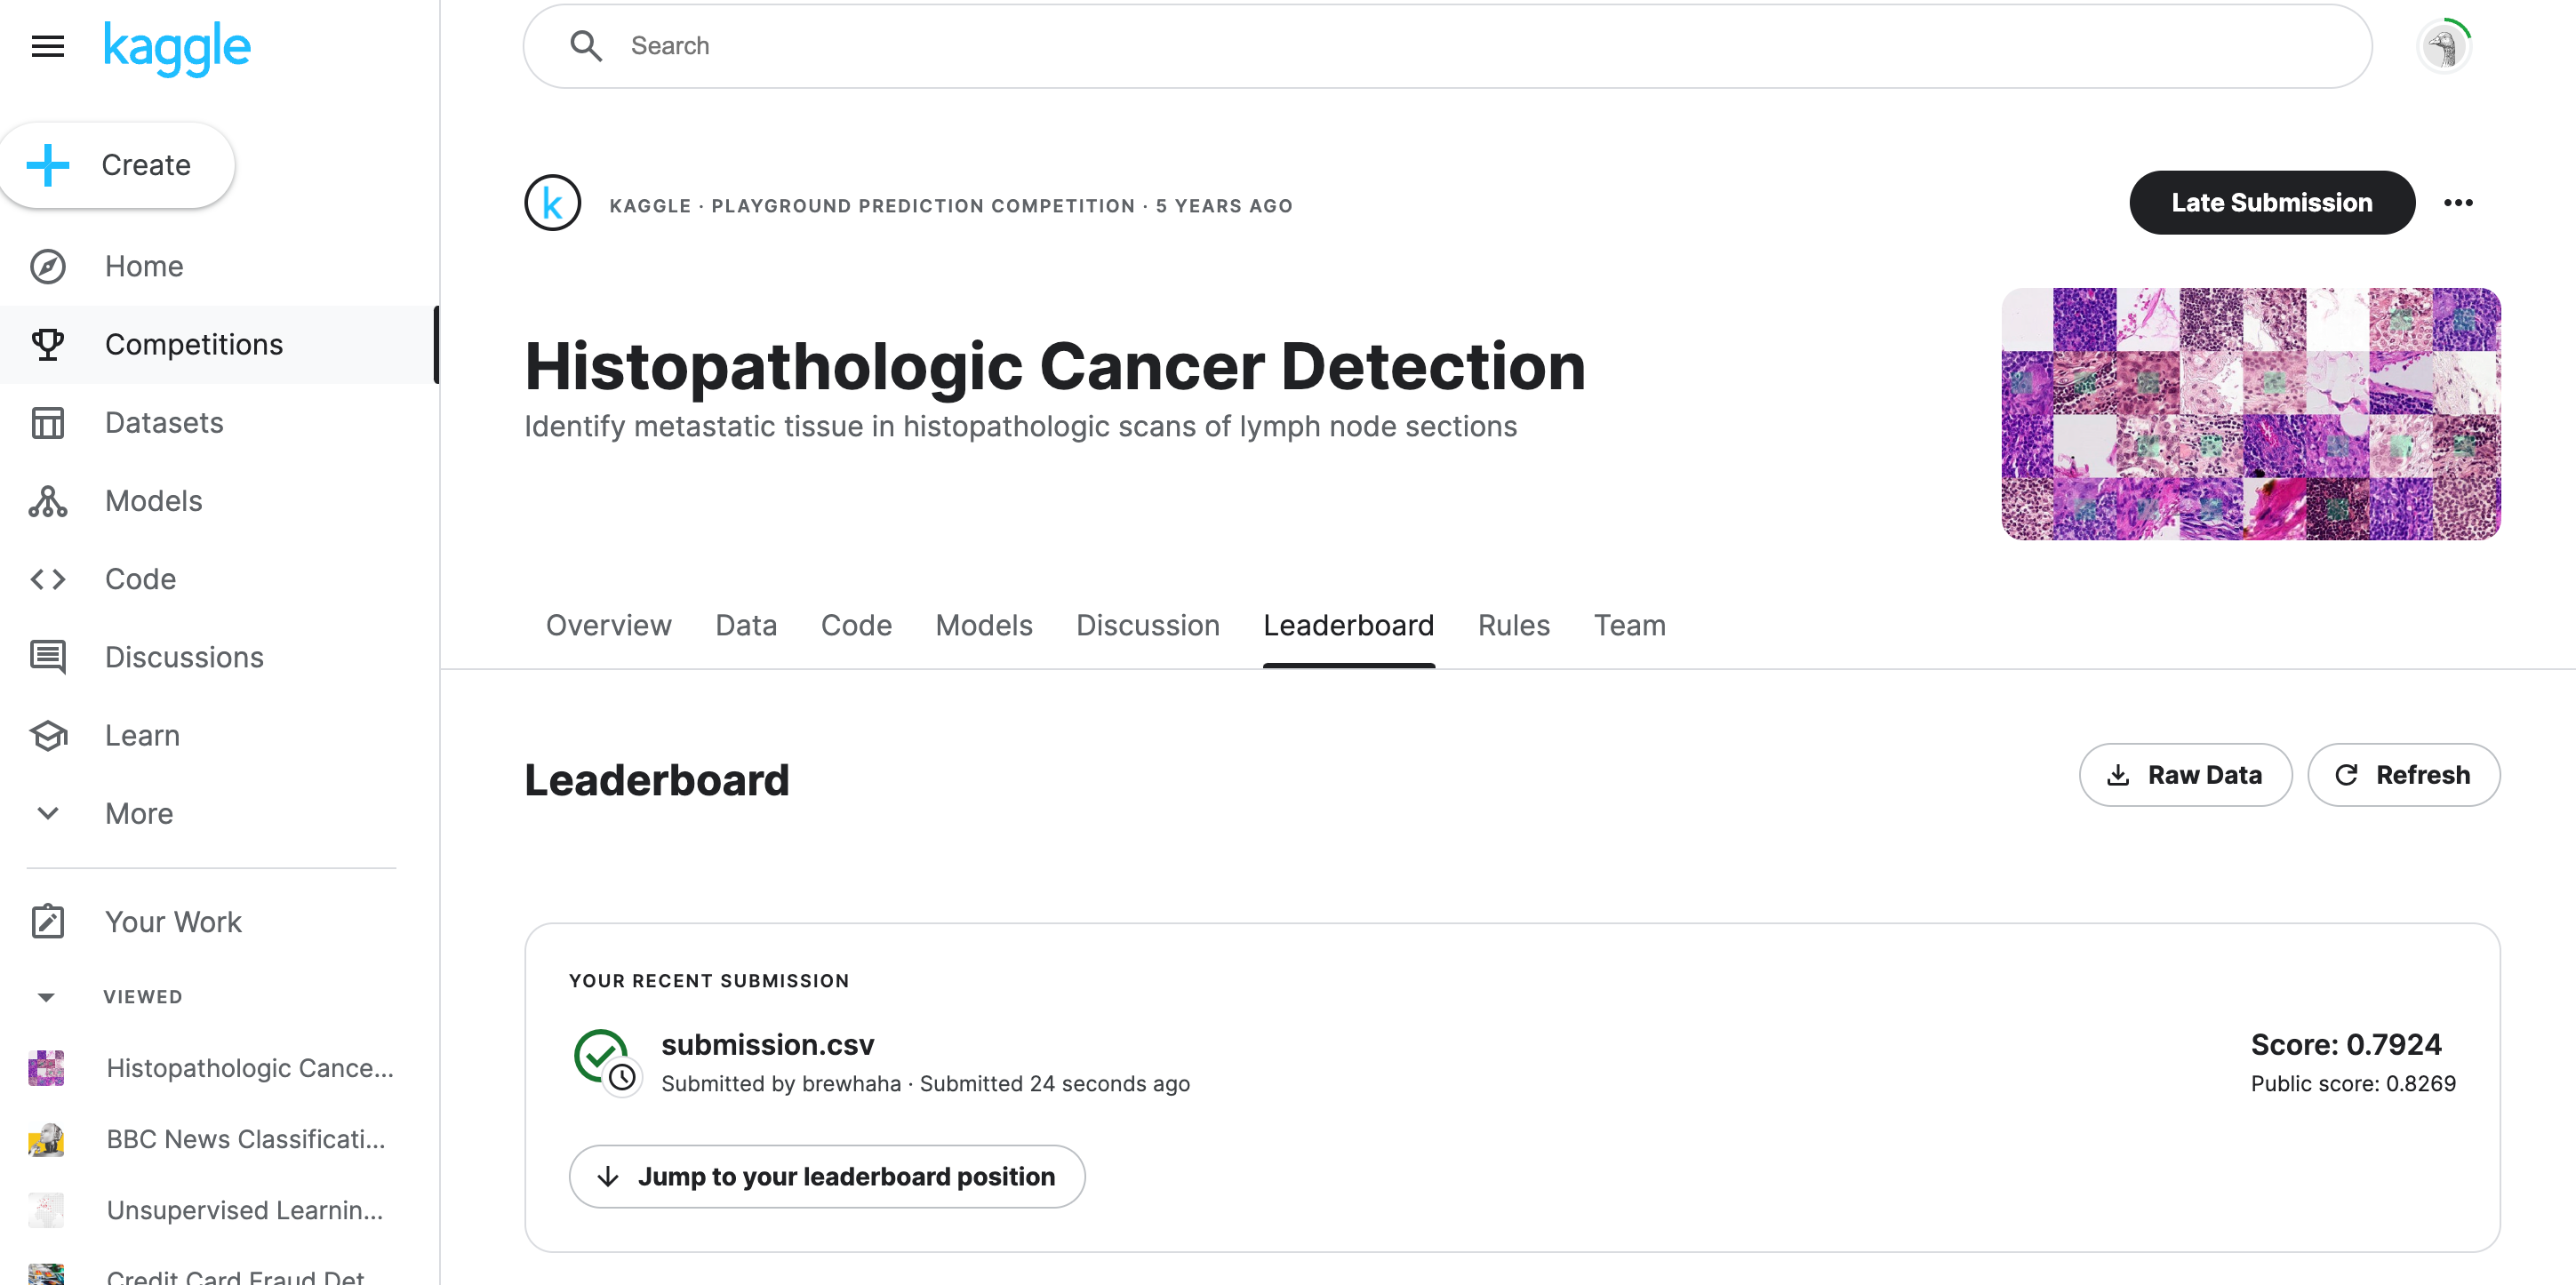

# Results and Analysis

This section delves into the performance of the MobileNetV2 and EfficientNetB0 models, based on their training and validation outcomes. We evaluate the models using various metrics and visualization techniques to understand their behavior and effectiveness in predicting metastatic cancer from histopathologic scans.

## Training and Validation Curves

The training and validation curves for MobileNetV2 showed steady improvement over epochs, indicating effective learning with a final accuracy of approximately 82.69%. In contrast, EfficientNetB0 struggled to surpass the baseline, hovering around 50% accuracy, which suggests the model did not learn effectively from the training data.

## Performance Metrics

### AUC-ROC Curves

For MobileNetV2, the AUC-ROC curve demonstrated strong performance, indicating a good balance between the true positive rate and false positive rate. Unfortunately, EfficientNetB0's AUC-ROC curve was closer to the line of no-discrimination (AUC ~ 0.5), reflecting its overall lack of effectiveness in this task.

### Precision-Recall Curves

The precision-recall curve for MobileNetV2 showed promising results, with higher precision across most recall levels, suitable for a medical diagnosis application where precision is critical. EfficientNetB0’s precision-recall curve was not as informative due to the model's poor performance.

## Comparison between MobileNetV2 and EfficientNetB0

MobileNetV2 outperformed EfficientNetB0 significantly in this task. Several factors may have contributed to this outcome:
- **Model Complexity**: MobileNetV2's architecture might have been more suited to the size and nature of the dataset. EfficientNetB0, despite its scalability and potential for higher accuracy, might require more data or further tuning to match its capabilities.
- **Training Dynamics**: The training process for MobileNetV2 might have been more stable or better optimized in terms of learning rate and other hyperparameters compared to EfficientNetB0.

## Discussion of Training Outcomes

### Challenges Faced

- **EfficientNetB0's Underperformance**: The most notable challenge was EfficientNetB0’s inability to learn effectively from the dataset, as indicated by its 50% accuracy, which is akin to random guessing in a binary classification task.
  
- **Hyperparameter Tuning**: Finding the optimal set of hyperparameters for EfficientNetB0 proved challenging, which could be a contributing factor to its lackluster performance.

### Solutions to Overcome Challenges

- **Model Architecture Reevaluation**: For tasks like this, where EfficientNetB0 underperformed, revisiting the model architecture choice and considering alternatives or adjustments is crucial.
  
- **Enhanced Data Augmentation**: Introducing more varied and extensive data augmentation techniques could help the model generalize better from the training data.

- **Advanced Hyperparameter Optimization**: Employing more sophisticated hyperparameter optimization techniques, such as Bayesian optimization, could potentially improve model performance by finding a more effective combination of parameters.


# Conclusion

This project embarked on a journey to automate the detection of metastatic cancer in histopathologic scans, employing two distinct convolutional neural network architectures: MobileNetV2 and EfficientNetB0. Through rigorous training, validation, and evaluation, we sought to understand each model's capabilities and identify the most effective approach for this critical task.

## Summary of Findings

- **MobileNetV2** demonstrated promising performance, achieving an accuracy of approximately 82.69%. Its architecture proved efficient and effective for the dataset at hand, striking a balance between computational resource requirements and predictive power.
- **EfficientNetB0**, on the other hand, struggled to learn from the dataset, with performance equivalent to random guessing (50% accuracy). This outcome suggests that despite EfficientNetB0's potential for scalability and high accuracy, it may require further tuning or a larger dataset to realize its full potential.

## Reflection on the Performance of Both Models

The comparison between MobileNetV2 and EfficientNetB0 highlighted the importance of model selection tailored to the specific characteristics of the dataset and task. While EfficientNetB0 has shown exceptional performance on benchmark datasets, its application to this particular challenge revealed limitations that warrant further investigation.

## Insights Gained Through Model Comparison and Hyperparameter Tuning

- **Model Architecture Suitability**: The effectiveness of a model architecture can vary significantly based on the task and dataset. MobileNetV2's success underscores the importance of choosing an architecture that aligns with the data's nature and the computational constraints.
- **Hyperparameter Optimization**: The challenge faced with EfficientNetB0 underscores the critical role of hyperparameter tuning in model performance. Even architectures known for their high accuracy may falter without careful optimization.

## Future Improvements and Next Steps

### Suggestions for Further Tuning

- **Advanced Hyperparameter Optimization**: Employing more sophisticated techniques such as Bayesian optimization could help in identifying optimal configurations for both models, potentially improving EfficientNetB0's performance.
- **Model Architecture Adjustments**: Experimenting with variations of EfficientNet, such as using different scaling coefficients, might yield better results.

### Possible Additional Data to Improve Model Performance

- **Data Augmentation**: Further exploration of data augmentation techniques can help the models generalize better from the available data, potentially enhancing performance.
- **Dataset Expansion**: Acquiring additional data, especially underrepresented classes or more varied examples, could significantly benefit model training, especially for architectures like EfficientNetB0 that might require substantial data to learn effectively.

In conclusion, while MobileNetV2 has shown considerable promise in detecting metastatic cancer in histopathologic scans, there remains ample opportunity for improvement and exploration, particularly with the EfficientNetB0 model. Future work will focus on addressing the identified challenges, exploring new methodologies, and ultimately advancing the goal of automating medical diagnoses with greater accuracy and efficiency.